In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from numpy.linalg import inv

# Read Data

In [2]:
train = pd.read_csv('C:/Users/Na Kyungmi/OneDrive - postech.ac.kr/문서/대학교/4학년 2학기/수학의응용과빅데이터/CO2_dataset/archive.csv', encoding='CP949')
train = train.to_numpy()

In [3]:
print(train.shape)
print(train[0])
co2 = train[:,3]

(720, 7)
[1.9580000e+03 1.0000000e+00 1.9580411e+03           nan           nan
           nan           nan]


In [4]:

def preprocessing(co2,p):
    # p는 window size
    size = co2.shape[0] # sample size

    X = np.zeros((1,p))
    Y = np.zeros(shape=(1,))
    x = np.zeros(shape=(1,p))
    y = np.zeros(shape=(1,))


    for i in range(size-p-1):
        if math.isnan(co2[i]): #co2 값이 nan일 때
            continue
        else: # co2 값이 nan이 아닐 때
            for m in range(p):
                x[0,m]=co2[i+m]
            if np.sum(np.isnan(x))>0 :
                continue
            y=co2[i+p] # 다음달 co2 concentration
            if math.isnan(y): # y값이 NaN이면 무시하고 다시 새로 시작
                continue
            X=np.vstack([X,x])
            Y=np.vstack([Y,y])
            
    X = X[1:]
    Y = Y[1:]
    return X,Y

X, Y = preprocessing(co2,7)
print(X.shape)

(683, 7)


In [7]:
print(Y.shape)

(683, 1)


# Test using Sklearn Library

In [37]:
# test용 코드
from sklearn.metrics import mean_squared_error

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]


for a in alphas:
    model = linear_model.Ridge(alpha=a).fit(X_i,Y_i)
    score = model.score(X_i, Y_i)
    pred_y = model.predict(X_i)
    mse = mean_squared_error(Y_i, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:1.00, MSE:0.47, RMSE:0.69
Alpha:0.0010, R2:1.00, MSE:0.47, RMSE:0.69
Alpha:0.0100, R2:1.00, MSE:0.47, RMSE:0.69
Alpha:0.1000, R2:1.00, MSE:0.47, RMSE:0.69
Alpha:0.3000, R2:1.00, MSE:0.47, RMSE:0.69
Alpha:0.5000, R2:1.00, MSE:0.47, RMSE:0.69
Alpha:0.7000, R2:1.00, MSE:0.47, RMSE:0.69
Alpha:1.0000, R2:1.00, MSE:0.47, RMSE:0.69


In [40]:
# test용 코드
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_i, Y_i, test_size=0.2,random_state=1)

ridge = linear_model.Ridge(alpha=0.0001).fit(X_train, Y_train)
Y_pred = ridge.predict(X_test)
score_ridge = ridge.score(X_test, Y_test)
mse_ridge = mean_squared_error(Y_test, Y_pred)
print("Final Result: Ridge R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score_ridge, mse_ridge, np.sqrt(mse_ridge)))

Final Result: Ridge R2:0.999, MSE:0.41, RMSE:0.64


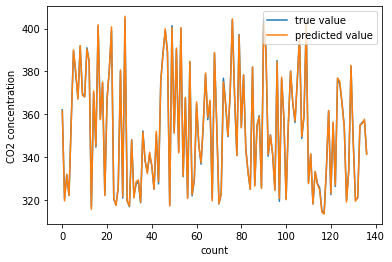

In [45]:
# comparison true value and predicted value

count = np.array(range(Y_test.shape[0]))

plt.plot(count, Y_test, label='true value')
plt.xlabel('count')
plt.ylabel('CO2 concentration')
plt.plot(count, Y_pred, label='predicted value')
plt.legend()
plt.show()

In [48]:
print(X_i.shape)

(683, 7)


In [28]:
# 직접 작성하는 코드
from numpy.linalg import inv
N = X_i.shape[0]
# standardization
X_std = np.zeros(shape=(N,p))

for i in range(p):
    mean = np.mean(X_i[:,i])
    std = np.std(X_i[:,i])
    X_std[:,i] = X_i[:,i]-mean

    
lamb = 0.1 # penalized할 때 사용하는 값

In [24]:
print(X_std[:,1].shape)

(683,)


In [29]:
X_trans = np.transpose(X_std)
save = np.matmul(inv(np.matmul(X_trans,X_std)+lamb*np.identity(p)),X_trans)
beta_ridge = np.matmul(save, Y_i)
beta_0 = np.sum(Y_i)/N

beta = np.vstack([beta_0, beta_ridge])
y_hat = np.matmul(X_std, beta_ridge)
y_pred = beta_0 + y_hat

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_i, y_pred)
print("Result MSE, RMSE ",mse, np.sqrt(mse))

Result MSE, RMSE  0.47371437964825786 0.6882691186216754


In [18]:
print(beta_ridge.shape)
print(Y_i.shape)
print(y_hat.shape)

(7, 1)
(683, 1)
(683, 1)


# HW1

In [25]:
def standard(X):
    N = X.shape[0]
    p = X.shape[1]
    X_std = np.zeros(shape=(N,p))
    X_mean = np.zeros(shape=(1,))
    for i in range(p):
        mean = np.mean(X[:,i])
        #std = np.std(X[:,i])
        X_std[:,i] = X[:,i]-mean
        a = mean.reshape((1,-1))
        X_mean = np.vstack([X_mean, mean])
        
    X_mean = X_mean[1:]    
    return X_std, X_mean



def solve(X,y,lamb):
    N = X.shape[0]
    p = X.shape[1]
    
    X_trans = np.transpose(X)
    save = np.matmul(inv(np.matmul(X_trans,X)+lamb*np.identity(p)),X_trans)
    beta_ridge = np.matmul(save, y)
    beta_0 = np.sum(y)/N

    #beta = np.vstack([beta_0, beta_ridge])
    return beta_ridge, beta_0

In [26]:
# 직접 짠 코드를 test
from sklearn.metrics import mean_squared_error

# traning 과정


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# training

X_std = np.zeros(shape=(X_train.shape[0],X_train.shape[1]))
X_std, X_mean = standard(X_train)
beta_ridge, beta_0 = solve(X_std, Y_train, 0.1)



In [28]:
print("beta_ridge : ", beta_ridge)
print("beta_0 : ", beta_0)

beta_ridge :  [[ 0.39005535]
 [-0.60418086]
 [ 0.26438981]
 [ 0.30876097]
 [-0.16131718]
 [-0.98105286]
 [ 1.78508866]]
beta_0 :  353.5192307692308


In [35]:
# test
test_std = X_test - np.transpose(X_mean)
Y_pred = np.matmul(test_std, beta_ridge)+beta_0

mse = mean_squared_error(Y_test, Y_pred)
print("Result MSE : ",mse)
print("Result RMSE : ", np.sqrt(mse))

Result MSE :  0.4119404205689983
Result RMSE :  0.6418258490969324


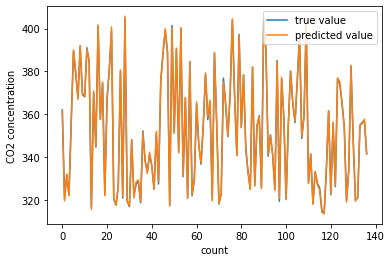

In [36]:
count = np.array(range(Y_test.shape[0]))

plt.plot(count, Y_test, label='true value')
plt.xlabel('count')
plt.ylabel('CO2 concentration')
plt.plot(count, Y_pred, label='predicted value')
plt.legend()
plt.savefig("randomly test")
plt.show()

In [37]:
# 전체 데이터에 대해서 prediction

X_total = X - np.transpose(X_mean)
Y_total_pred = np.matmul(X_total, beta_ridge)+beta_0

mse = mean_squared_error(Y, Y_total_pred)
print("Result MSE, RMSE ",mse, np.sqrt(mse))

Result MSE, RMSE  0.4753118326033074 0.6894286276354554


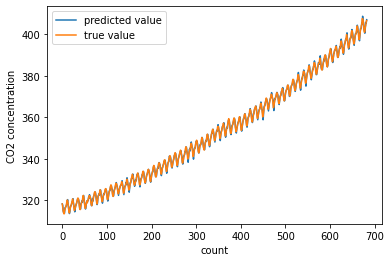

In [38]:
count = np.array(range(Y_total_pred.shape[0]))
plt.plot(count, Y_total_pred, label='predicted value')
plt.xlabel('count')
plt.ylabel('CO2 concentration')
plt.plot(count, Y, label='true value')
plt.legend()
plt.show()

# Try 2

#### 시각적으로 보기 좋게 하기 위해 다시 test 진행

In [39]:
X_train = X[:500, :]
X_test = X[500:, :]
Y_train = Y[:500]
Y_test = Y[500:]

In [40]:
X_std = np.zeros(shape=(X_train.shape[0],X_train.shape[1]))

X_std, X_mean = standard(X_train)

beta_ridge, beta_0 = solve(X_std, Y_train, 0.1)

In [44]:
print("beta_ridge : ", beta_ridge)
print("beta_0 : ", beta_0)

beta_ridge :  [[ 0.37086322]
 [-0.55368685]
 [ 0.23652269]
 [ 0.25472256]
 [-0.05088992]
 [-1.10014065]
 [ 1.84328343]]
beta_0 :  340.7162


In [43]:
# test
test_std = X_test - np.transpose(X_mean)
Y_pred = np.matmul(test_std, beta_ridge)+beta_0

mse = mean_squared_error(Y_test, Y_pred)
print("Result MSE, RMSE ",mse, np.sqrt(mse))

Result MSE, RMSE  0.6222206246713322 0.7888096251132666


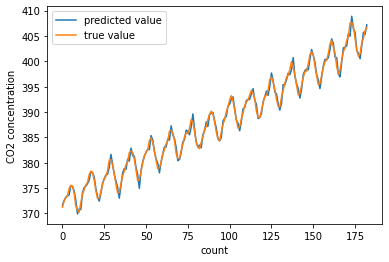

In [45]:
count = np.array(range(Y_pred.shape[0]))
plt.plot(count, Y_pred, label='predicted value')
plt.xlabel('count')
plt.ylabel('CO2 concentration')
plt.plot(count, Y_test, label='true value')
plt.legend()
plt.show()

Result MSE, RMSE  0.475068039966404 0.689251797216666


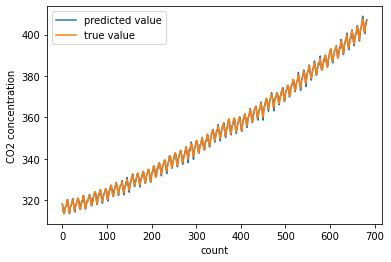

In [47]:
# 전체 데이터에 대해서 prediction

X_total = X - np.transpose(X_mean)
Y_total_pred = np.matmul(X_total, beta_ridge)+beta_0

mse = mean_squared_error(Y, Y_total_pred)
print("Result MSE, RMSE ",mse, np.sqrt(mse))

count = np.array(range(Y_total_pred.shape[0]))
plt.plot(count, Y_total_pred, label='predicted value')
plt.xlabel('count')
plt.ylabel('CO2 concentration')
plt.plot(count, Y, label='true value')
plt.legend()
plt.show()

# Varying window size

In [49]:
window_size = list(range(2, 100, 1))
mse = []
rmse = []

for a in window_size:
    X,Y = preprocessing(co2,a)
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

    # training

    X_s = np.zeros(shape=(X_train.shape[0],X_train.shape[1]))
    X_s, X_mean = standard(X_train)
    beta_ridge, beta_0 = solve(X_s, Y_train, 0.1)
    
    test_std = X_test - np.transpose(X_mean)
    Y_pred = np.matmul(test_std, beta_ridge)+beta_0
    
    error = mean_squared_error(Y_test, Y_pred)
    mse.append(error)
    rmse.append(np.sqrt(error))

    

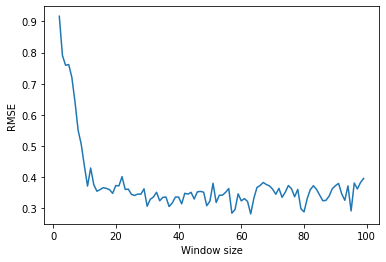

In [50]:
plt.plot(window_size, rmse)
plt.xlabel('Window size')
plt.ylabel('RMSE')
plt.savefig('RMSE_depending_on_window_size3.png', dpi=300)
plt.show()